## Importing libraries for data analysis

In [1]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

# Use Pandas Web Datareader to download the stocks prices for large Alberta oil producers from Yahoo Finance

In [2]:
start = datetime.datetime(2016, 3, 1)
end = datetime.datetime(2021, 3, 1)

Suncor = web.DataReader("SU", 'yahoo', start, end)
CNRL = web.DataReader("CNQ", 'yahoo', start, end)
Cenovus = web.DataReader("CVE", 'yahoo', start, end)
#CrescentPoint = web.DataReader("CPG", 'yahoo', start, end)
Imperial = web.DataReader("IMO", 'yahoo', start, end)

# Download the stocks prices for large US oil producers 

In [3]:
ExxonMobil = web.DataReader("XOM", 'yahoo', start, end)
Chevron = web.DataReader("CVX", 'yahoo', start, end)
ConocoPhillips = web.DataReader("COP", 'yahoo', start, end)
EOGResources = web.DataReader("EOG", 'yahoo', start, end)
#OccidentalPetroleum = web.DataReader("OXY", 'yahoo', start, end)

## Take a look at recent stock prices for Suncor and Chevron. Make sure the data sets have been downloaded properly.

In [4]:
Suncor.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,21.139999,19.840000,20.820000,20.930000,12928200.0,20.761913
2021-02-24,21.860001,20.790001,21.150000,21.530001,11814200.0,21.357094
2021-02-25,21.770000,20.629999,21.750000,20.650000,11358800.0,20.484161
2021-02-26,20.320000,19.520000,20.230000,19.860001,10115700.0,19.700506
2021-03-01,20.700001,20.010000,20.469999,20.240000,10492200.0,20.077454


In [5]:
EOGResources.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,68.160004,63.619999,67.300003,67.849998,4236500.0,67.849998
2021-02-24,72.860001,67.410004,68.150002,72.370003,6106600.0,72.370003
2021-02-25,72.839996,69.839996,72.400002,70.589996,5983200.0,70.589996
2021-02-26,69.349998,63.419998,69.250000,64.559998,9257400.0,64.559998
2021-03-01,65.980003,64.129997,65.459999,64.980003,4853300.0,64.980003


# Concatinate all datasets into a single dataset 'cop' for canadian oil producers and check the head of the dataset

In [6]:
#stocks list for combined dataset
CAD_stocks = ["SU", "CNQ", "CVE", "IMO"]
#concatinating data into Canadian Oil Producers
cop = pd.concat([Suncor, CNRL, Cenovus, Imperial], axis=1, keys=CAD_stocks)
cop.head()

SU                                                         \
                 High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2016-03-01  25.209999  24.650000  24.700001  25.059999  4728100.0  21.152454   
2016-03-02  24.900000  24.080000  24.730000  24.870001  4042800.0  21.174593   
2016-03-03  25.230000  24.639999  24.850000  24.959999  5763600.0  21.251219   
2016-03-04  25.510000  24.920000  25.160000  25.320000  4917000.0  21.557730   
2016-03-07  26.350000  25.180000  25.190001  26.040001  5166800.0  22.170742   

                  CNQ                                   ...    CVE         \
                 High        Low       Open      Close  ...   Open  Close   
Date                                                    ...                 
2016-03-01  21.559999  21.059999  21.090000  21.459999  ...  11.61  11.77   
2016-03-02  22.469999  21.040001  21.209999  22.459999  ...  11.63  12.03   
2016-03-03  24.680000  23.000000  23.000000  24.500000  ...  11.98  12.19   
2016-03-04  25.920000  24.740000  24.750000  25.830000  ...  12.32  12.54   
2016-03-07  26.280001  25.600000  25.600000  26.139999  ...  12.53  12.76   

                                        IMO                                   \
               Volume  Adj Close       High        Low       Open      Close   
Date                                                                           
2016-03-01  3269100.0  10.971766  32.400002  31.690001  32.110001  32.150002   
2016-03-02  2625800.0  11.214131  32.400002  31.190001  31.809999  32.349998   
2016-03-03  2446300.0  11.363279  33.040001  32.180000  32.279999  32.669998   
2016-03-04  3036800.0  11.689544  33.209999  32.610001  32.820000  33.139999   
2016-03-07  3514900.0  11.894625  34.000000  33.119999  33.200001  33.570000   

                                 
              Volume  Adj Close  
Date                             
2016-03-01  238500.0  28.785311  
2016-03-02  289000.0  29.058376  
2016-03-03  296200.0  29.345814  
2016-03-04  272500.0  29.767992  
2016-03-07  337500.0  30.154238  

[5 rows x 24 columns]

In [7]:
#stocks list for combined dataset
USA_stocks = ["XOM", "CVX", "COP", "EOG"]
#concatinating data into US Oil Producers
usop = pd.concat([ExxonMobil, Chevron, ConocoPhillips, EOGResources], axis=1, keys=USA_stocks)
usop.head()

XOM                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2016-03-01  81.769997  80.320000  80.559998  81.279999  15730600.0  63.675518   
2016-03-02  82.720001  80.309998  80.949997  82.699997  14094400.0  64.787964   
2016-03-03  82.720001  81.540001  82.660004  82.400002  13216200.0  64.552948   
2016-03-04  82.970001  81.760002  82.660004  82.290001  18402700.0  64.466766   
2016-03-07  84.459999  82.209999  82.309998  84.459999  18945600.0  66.166771   

                  CVX                                   ...        COP  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2016-03-01  86.529999  83.370003  84.120003  86.129997  ...  34.070000   
2016-03-02  87.180000  84.400002  85.400002  87.139999  ...  34.279999   
2016-03-03  87.570000  86.050003  87.000000  87.529999  ...  36.500000   
2016-03-04  88.620003  86.699997  87.419998  87.930000  ...  38.919998   
2016-03-07  90.760002  87.550003  87.940002  90.669998  ...  41.250000   

                                                    EOG                        \
                Close      Volume  Adj Close       High        Low       Open   
Date                                                                            
2016-03-01  34.459999  11581000.0  30.313641  65.470001  62.529999  65.099998   
2016-03-02  36.490002  16943700.0  32.099392  67.120003  64.139999  64.949997   
2016-03-03  38.560001  20248700.0  33.920315  69.669998  66.180000  66.949997   
2016-03-04  41.119999  24819100.0  36.172291  71.519997  68.739998  69.910004   
2016-03-07  41.400002  17548300.0  36.418598  75.529999  70.220001  71.120003   

                                             
                Close     Volume  Adj Close  
Date                                         
2016-03-01  65.019997  7542900.0  60.784546  
2016-03-02  67.000000  5243400.0  62.635563  
2016-03-03  69.250000  6644400.0  64.739021  
2016-03-04  71.410004  7930800.0  66.758308  
2016-03-07  75.470001  8446300.0  70.553818  

[5 rows x 24 columns]

## Provide the column names 'Entity' and 'Stock' for empty lists and make sure change is applied

In [8]:
cop.columns.names
usop.columns.names

FrozenList([None, None])

In [9]:
cop.columns.names = ['Entity','Stock']
cop.head() 

Entity             SU                                                         \
Stock            High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2016-03-01  25.209999  24.650000  24.700001  25.059999  4728100.0  21.152454   
2016-03-02  24.900000  24.080000  24.730000  24.870001  4042800.0  21.174593   
2016-03-03  25.230000  24.639999  24.850000  24.959999  5763600.0  21.251219   
2016-03-04  25.510000  24.920000  25.160000  25.320000  4917000.0  21.557730   
2016-03-07  26.350000  25.180000  25.190001  26.040001  5166800.0  22.170742   

Entity            CNQ                                   ...    CVE         \
Stock            High        Low       Open      Close  ...   Open  Close   
Date                                                    ...                 
2016-03-01  21.559999  21.059999  21.090000  21.459999  ...  11.61  11.77   
2016-03-02  22.469999  21.040001  21.209999  22.459999  ...  11.63  12.03   
2016-03-03  24.680000  23.000000  23.000000  24.500000  ...  11.98  12.19   
2016-03-04  25.920000  24.740000  24.750000  25.830000  ...  12.32  12.54   
2016-03-07  26.280001  25.600000  25.600000  26.139999  ...  12.53  12.76   

Entity                                  IMO                                   \
Stock          Volume  Adj Close       High        Low       Open      Close   
Date                                                                           
2016-03-01  3269100.0  10.971766  32.400002  31.690001  32.110001  32.150002   
2016-03-02  2625800.0  11.214131  32.400002  31.190001  31.809999  32.349998   
2016-03-03  2446300.0  11.363279  33.040001  32.180000  32.279999  32.669998   
2016-03-04  3036800.0  11.689544  33.209999  32.610001  32.820000  33.139999   
2016-03-07  3514900.0  11.894625  34.000000  33.119999  33.200001  33.570000   

Entity                           
Stock         Volume  Adj Close  
Date                             
2016-03-01  238500.0  28.785311  
2016-03-02  289000.0  29.058376  
2016-03-03  296200.0  29.345814  
2016-03-04  272500.0  29.767992  
2016-03-07  337500.0  30.154238  

[5 rows x 24 columns]

In [10]:
usop.columns.names = ['Entity','Stock']
usop.head() 

Entity            XOM                                                          \
Stock            High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2016-03-01  81.769997  80.320000  80.559998  81.279999  15730600.0  63.675518   
2016-03-02  82.720001  80.309998  80.949997  82.699997  14094400.0  64.787964   
2016-03-03  82.720001  81.540001  82.660004  82.400002  13216200.0  64.552948   
2016-03-04  82.970001  81.760002  82.660004  82.290001  18402700.0  64.466766   
2016-03-07  84.459999  82.209999  82.309998  84.459999  18945600.0  66.166771   

Entity            CVX                                   ...        COP  \
Stock            High        Low       Open      Close  ...       Open   
Date                                                    ...              
2016-03-01  86.529999  83.370003  84.120003  86.129997  ...  34.070000   
2016-03-02  87.180000  84.400002  85.400002  87.139999  ...  34.279999   
2016-03-03  87.570000  86.050003  87.000000  87.529999  ...  36.500000   
2016-03-04  88.620003  86.699997  87.419998  87.930000  ...  38.919998   
2016-03-07  90.760002  87.550003  87.940002  90.669998  ...  41.250000   

Entity                                              EOG                        \
Stock           Close      Volume  Adj Close       High        Low       Open   
Date                                                                            
2016-03-01  34.459999  11581000.0  30.313641  65.470001  62.529999  65.099998   
2016-03-02  36.490002  16943700.0  32.099392  67.120003  64.139999  64.949997   
2016-03-03  38.560001  20248700.0  33.920315  69.669998  66.180000  66.949997   
2016-03-04  41.119999  24819100.0  36.172291  71.519997  68.739998  69.910004   
2016-03-07  41.400002  17548300.0  36.418598  75.529999  70.220001  71.120003   

Entity                                       
Stock           Close     Volume  Adj Close  
Date                                         
2016-03-01  65.019997  7542900.0  60.784546  
2016-03-02  67.000000  5243400.0  62.635563  
2016-03-03  69.250000  6644400.0  64.739021  
2016-03-04  71.410004  7930800.0  66.758308  
2016-03-07  75.470001  8446300.0  70.553818  

[5 rows x 24 columns]

# Check the min and max of adjusted closing stock prices for given period. This is a finally adjusted price the stocks were traded by the end of the day.

In [11]:
max_CAD_stock = cop.xs(key='Adj Close',axis=1,level='Stock').max()
max_CAD_stock

Entity
SU     38.311535
CNQ    32.249527
CVE    15.258459
IMO    33.072918
dtype: float64

In [12]:
## The highest stock price for the last 7 year period are Suncor and Imperial.

In [13]:
max_US_stock = usop.xs(key='Adj Close',axis=1,level='Stock').max()
max_US_stock

Entity
XOM     75.144188
CVX    115.743240
COP     74.130875
EOG    125.900688
dtype: float64

In [14]:
## The highest US oil company stock price for the last 7 year period are Chevron and EOG Resources.

In [15]:
min_CAD_stock = cop.xs(key='Close',axis=1,level='Stock').min()
min_CAD_stock

Entity
SU     10.45
CNQ     7.74
CVE     1.60
IMO     7.83
dtype: float64

In [16]:
## Crescent Point Energy and Cenovus were hit the most - more then 10 times drop. CNRL and Cenovus recently made significant acquisitions. 

In [17]:
min_US_stock = usop.xs(key='Close',axis=1,level='Stock').min()
min_US_stock

Entity
XOM    31.450001
CVX    54.220001
COP    22.670000
EOG    29.760000
dtype: float64

In [18]:
## OXY and ConocoPhillips were hit the most among largest US producers 

## Let's visualise the information about min and max prices using bar plots.  

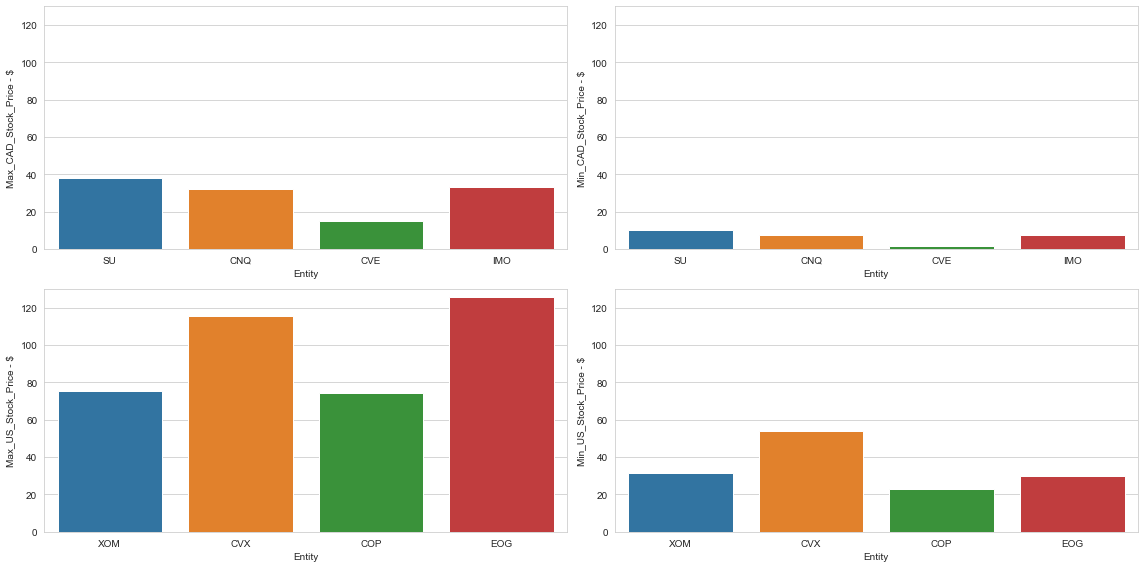

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[16, 8])
axes = axes.flatten()

sns.barplot(max_CAD_stock.index, max_CAD_stock.values, ax=axes[0])
axes.flatten()[0].set_ylim(0,130)
axes.flatten()[0].set_ylabel('Max_CAD_Stock_Price - $')

sns.barplot(min_CAD_stock.index, min_CAD_stock.values, ax=axes[1])
axes.flatten()[1].set_ylim(0,130)
axes.flatten()[1].set_ylabel('Min_CAD_Stock_Price - $')
plt.tight_layout()

sns.barplot(max_US_stock.index, max_US_stock.values, ax=axes[2])
axes.flatten()[2].set_ylim(0,130)
axes.flatten()[2].set_ylabel('Max_US_Stock_Price - $')

sns.barplot(min_US_stock.index, min_US_stock.values, ax=axes[3])
axes.flatten()[3].set_ylim(0,130)
axes.flatten()[3].set_ylabel('Min_US_Stock_Price - $')
plt.tight_layout()

# Let put all the companies together one one plot to visualize Canadian Oil Companies stock prices with time.

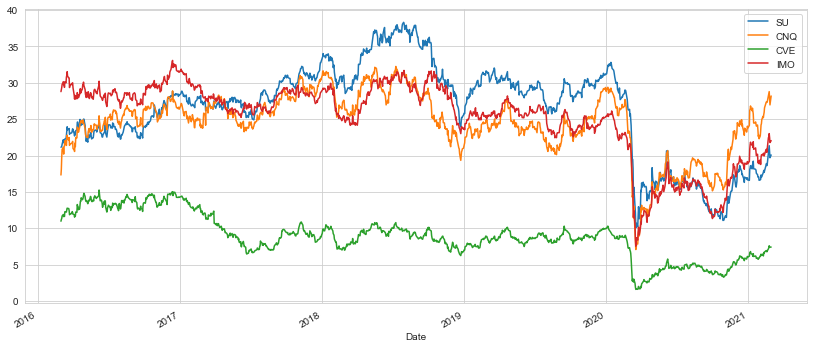

In [20]:
for stock in CAD_stocks:
    cop[stock]['Adj Close'].plot(figsize=(14,6),label=stock)
plt.legend()

# Visualize US Oil Companies stock prices with time.

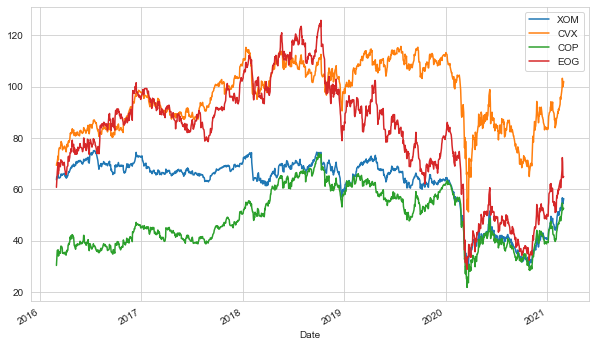

In [21]:
for stock in USA_stocks:
    usop[stock]['Adj Close'].plot(figsize=(10,6),label=stock)
plt.legend()

# Look at the Canadian Oil Companies stock price for the last year when pandemic striked

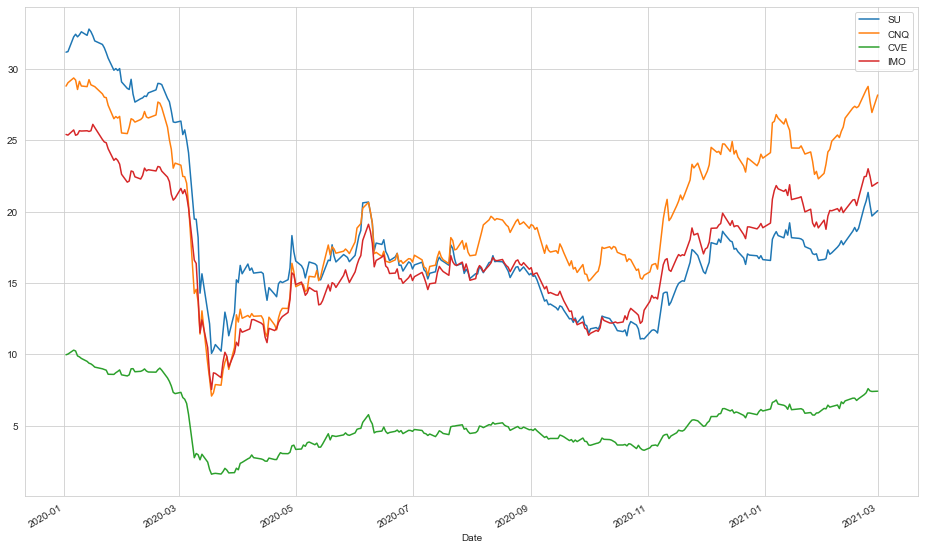

In [22]:
for stock in CAD_stocks:
    cop[stock]['Adj Close'].loc['2020-01-01':'2021-03-01'].plot(figsize=(16,10),label=stock)
plt.legend()

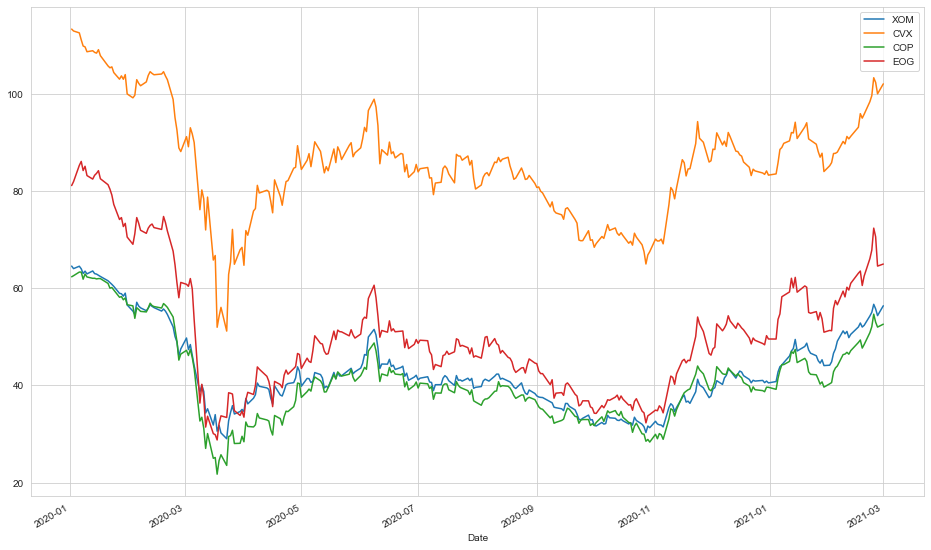

In [23]:
for stock in USA_stocks:
    usop[stock]['Adj Close'].loc['2020-01-01':'2021-03-01'].plot(figsize=(16,10),label=stock)
plt.legend()

## Visualizing stock prices vs. time using interactive data plotting(iplot). The significant price drop occured between mid 2014 and end of 2016. It directly correlates with overall oil price drop started in 2014. 

In [24]:
cop.xs(key='Adj Close',axis=1,level='Stock').iplot()

## We want to calculate Return - the expected value, of the probability distribution of investment returns

In [25]:
CAD_returns = pd.DataFrame()
for stock in CAD_stocks:
    CAD_returns[stock+' Return'] = cop[stock]['Adj Close'].pct_change()
CAD_returns.head()

,SU Return,CNQ Return,CVE Return,IMO Return
Date,,,,
2016-03-01,NaN,NaN,NaN,NaN
2016-03-02,0.001047,0.046598,0.022090,0.009486
2016-03-03,0.003619,0.090828,0.013300,0.009892
2016-03-04,0.014423,0.054286,0.028712,0.014386
2016-03-07,0.028436,0.012002,0.017544,0.012975


In [26]:
US_returns = pd.DataFrame()
for stock in USA_stocks:
    US_returns[stock+' Return'] = usop[stock]['Adj Close'].pct_change()
US_returns.head()

,XOM Return,CVX Return,COP Return,EOG Return
Date,,,,
2016-03-01,NaN,NaN,NaN,NaN
2016-03-02,0.017471,0.011726,0.058909,0.030452
2016-03-03,-0.003627,0.004476,0.056728,0.033582
2016-03-04,-0.001335,0.004570,0.066390,0.031191
2016-03-07,0.026370,0.031161,0.006809,0.056854


In [27]:
## Let's visualize our returns using pair plot

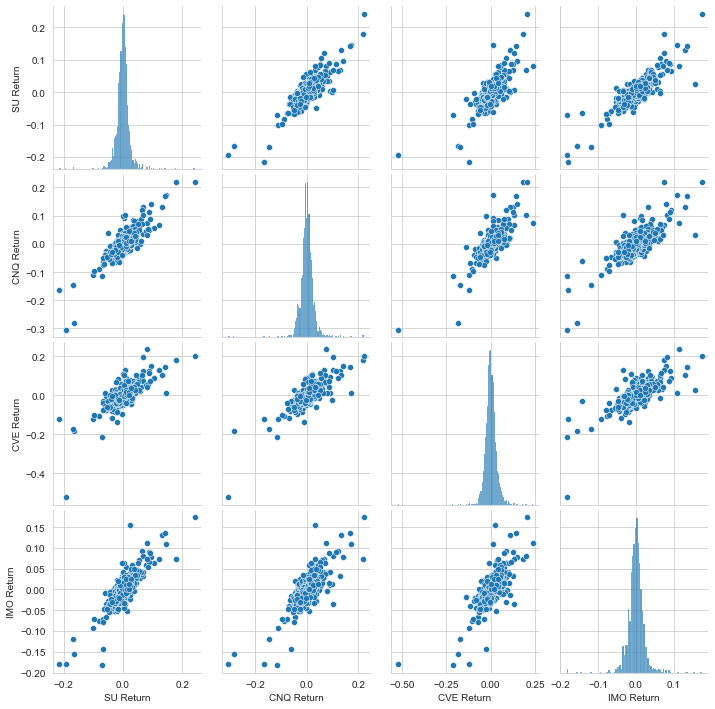

In [28]:
import seaborn as sns
sns.pairplot(CAD_returns[1:]) # avoiding NaN row

## I would like to look at best gain day and worst drop day for Canadian oil companies using idxmax and idxmin.

In [29]:
print(CAD_returns.idxmax(), CAD_returns.idxmin())

SU Return    2020-11-09
CNQ Return   2020-11-09
CVE Return   2020-04-02
IMO Return   2020-11-09
dtype: datetime64[ns] SU Return    2020-03-12
CNQ Return   2020-03-09
CVE Return   2020-03-09
IMO Return   2020-03-17
dtype: datetime64[ns]


# I want to look at standard deviation to identify the riskiest stock in 2016

In [63]:
CAD_returns.loc['2016-01-01':'2016-12-31'].std() 
#Suncor and Imperial had the lowest return in 2015

SU Return     0.017254
CNQ Return    0.022483
CVE Return    0.024907
IMO Return    0.015407
dtype: float64

## What is the riskiest stock in 2020? 

In [31]:
CAD_returns.loc['2020-01-01':'2020-12-31'].std() 
## It is Suncor and Imperial

SU Return     0.046937
CNQ Return    0.051858
CVE Return    0.064427
IMO Return    0.044142
dtype: float64

## Create distribution plots to show return on stocks in 2020. 

<AxesSubplot:xlabel='IMO Return', ylabel='Density'>

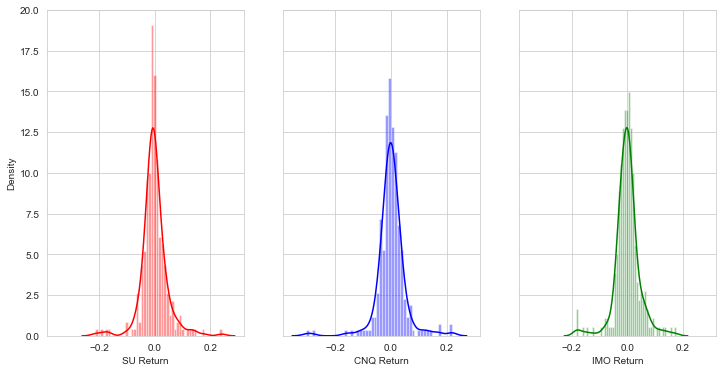

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(CAD_returns.loc['2020-01-01':'2020-12-31']['SU Return'],
             color='red', bins=50, ax=axes[0])
sns.distplot(CAD_returns.loc['2020-01-01':'2020-12-31']['CNQ Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(CAD_returns.loc['2020-01-01':'2020-12-31']['IMO Return'], 
             color='green', bins=50, ax=axes[2])


<AxesSubplot:xlabel='EOG Return', ylabel='Density'>

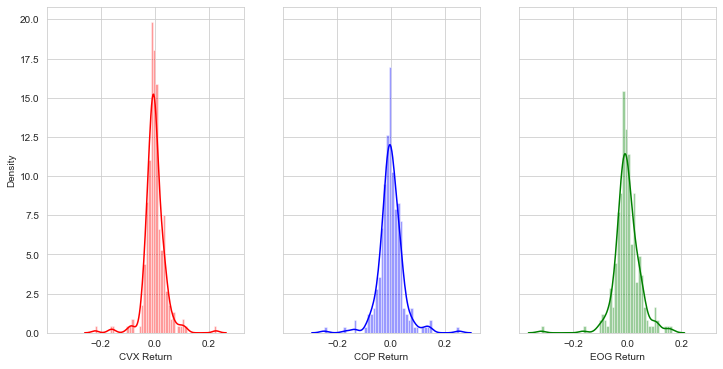

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(US_returns.loc['2020-01-01':'2020-12-31']['CVX Return'], 
             color='red', bins=50, ax=axes[0])
sns.distplot(US_returns.loc['2020-01-01':'2020-12-31']['COP Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(US_returns.loc['2020-01-01':'2020-12-31']['EOG Return'], 
             color='green', bins=50, ax=axes[2])

## The other way to look at stock price correlation is to create a heatmap. 

<AxesSubplot:xlabel='Entity', ylabel='Entity'>

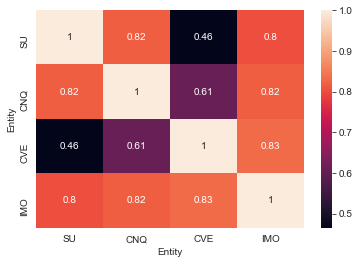

In [34]:
sns.heatmap(cop.xs(key='Adj Close',axis=1,level='Stock').corr(),annot=True)

## Let's look at moving average for CPG and CVE - the lowest stock prices as of 2020.

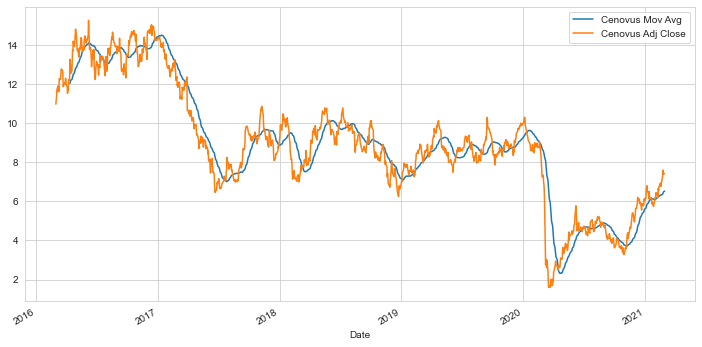

In [36]:
plt.figure(figsize=(12,6))
Cenovus['Adj Close'].loc['2011-01-01':'2021-03-01'].rolling(window=30).mean().plot(
    label='Cenovus Mov Avg')
Cenovus['Adj Close'].loc['2011-01-01':'2021-03-01'].plot(
    label='Cenovus Adj Close')
#CrescentPoint['Adj Close'].loc['2011-01-01':'2021-03-01'].rolling(window=30).mean().plot(
#    label='CrescentPoint Mov Avg')
#CrescentPoint['Adj Close'].loc['2011-01-01':'2021-03-01'].plot(
#    label='CrescentPoint Adj Close')

plt.legend()

## Create a candle plot for Cenovus stocks at year 2020. This financial chart takes a dataset that contains open, high, low and close values for specific time period 

In [37]:
Cenovus[['Open', 'High', 'Low', 'Close']].loc['2019-12-31':'2021-01-01'].iplot(kind='candle')


In [38]:
Cenovus.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,11.81,11.41,11.61,11.77,3269100.0,10.971766
2016-03-02,12.05,11.56,11.63,12.03,2625800.0,11.214131
2016-03-03,12.46,11.93,11.98,12.19,2446300.0,11.363279
2016-03-04,12.65,12.22,12.32,12.54,3036800.0,11.689544
2016-03-07,12.88,12.32,12.53,12.76,3514900.0,11.894625


In [39]:
Cenovus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-03-01 to 2021-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 108.9 KB


In [40]:
Cenovus_fltr = web.DataReader("CVE", 'yahoo', start, end)
dt_range = pd.date_range(start="2020-01-01", end="2021-03-01")
Cenovus_fltr = Cenovus_fltr[Cenovus_fltr.index.isin(dt_range)]
Cenovus_fltr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2020-01-02 to 2021-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       292 non-null    float64
 1   Low        292 non-null    float64
 2   Open       292 non-null    float64
 3   Close      292 non-null    float64
 4   Volume     292 non-null    float64
 5   Adj Close  292 non-null    float64
dtypes: float64(6)
memory usage: 16.0 KB


In [41]:
Suncor_fltr = web.DataReader("SU", 'yahoo', start, end)
Suncor_fltr = Suncor_fltr[Suncor_fltr.index.isin(dt_range)]

In [42]:
ExxonMobil_fltr = web.DataReader("XOM", 'yahoo', start, end)
ExxonMobil_fltr = ExxonMobil_fltr[ExxonMobil_fltr.index.isin(dt_range)]

In [59]:
fig = go.Figure(data=[go.Candlestick(x=Suncor_fltr.index,
                open=Suncor_fltr['Open'],
                high=Suncor_fltr['High'],
                low=Suncor_fltr['Low'],
                close=Suncor_fltr['Close'])])
                      

fig.update_layout(
    title='The Pandemic Downturn',
    yaxis_title='Suncor Stock Price, USD',
    shapes = [dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Pandemic Starts')]
)

fig.show()

In [62]:
fig = go.Figure(data=[go.Candlestick(x=ExxonMobil_fltr.index,
                open=ExxonMobil_fltr['Open'],
                high=ExxonMobil_fltr['High'],
                low=ExxonMobil_fltr['Low'],
                close=ExxonMobil_fltr['Close'])])
                      

fig.update_layout(
    title='The Pandemic Downturn',
    yaxis_title='ExxonMobil Stock Price, USD',
    shapes = [dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Pandemic Starts')]
)

fig.show()

## Create a Simple Moving Averages (SMA) plot of Cenovus for the year 2020, passing three periods[10,30,50]

In [45]:
Cenovus['Adj Close'].loc['2020-01-01':'2020-12-31'].ta_plot(
    study='sma',periods=[10,30,50],title='Simple Moving Averages')

## Look at Bollinger statistical chart characterizing the stock prices and volatility over time for Cenovus year 2020

In [46]:
Cenovus['Adj Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='boll')

## Let's call for closing stock price for all the companies once again

In [47]:
cop = web.DataReader(CAD_stocks,'yahoo',start=start,end=end)['Adj Close']
cop.head()

Symbols,SU,CNQ,CVE,IMO
Date,,,,
2016-03-01,21.152454,17.326168,10.971766,28.785311
2016-03-02,21.174593,18.133530,11.214131,29.058376
2016-03-03,21.251219,19.780569,11.363279,29.345814
2016-03-04,21.557730,20.854370,11.689544,29.767992
2016-03-07,22.170742,21.104658,11.894625,30.154238


In [48]:
usop = web.DataReader(USA_stocks,'yahoo',start=start,end=end)['Adj Close']
usop.head()

Symbols,XOM,CVX,COP,EOG
Date,,,,
2016-03-01,63.675518,69.345772,30.313641,60.784546
2016-03-02,64.787964,70.158928,32.099392,62.635563
2016-03-03,64.552948,70.472946,33.920315,64.739021
2016-03-04,64.466766,70.795006,36.172291,66.758308
2016-03-07,66.166771,73.001038,36.418598,70.553818


## How do the returns corelate for competitors - Cenovus and CNRL?

In [49]:
#Canadian companies stock correlation
cop_comp = cop.pct_change()
corr_cop = cop_comp.corr()
#American companies stock correlation
usop_comp = usop.pct_change()
corr_usop = usop_comp.corr()

Text(0, 0.5, 'Returns CNRL')

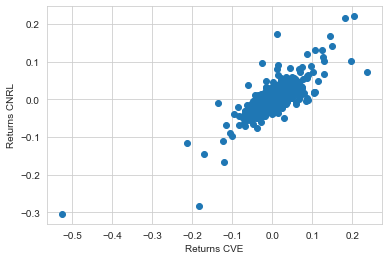

In [53]:
plt.scatter(cop_comp.CVE,cop_comp.CNQ)
plt.xlabel('Returns CVE')
plt.ylabel('Returns CNRL')
## We can see some positive correlations - the higher CVE, the higher CPG

Text(0, 0.5, 'Returns EOG')

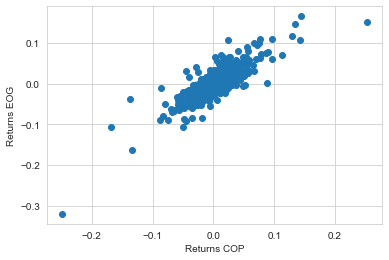

In [54]:
plt.scatter(usop_comp.COP,usop_comp.EOG)
plt.xlabel('Returns COP')
plt.ylabel('Returns EOG')
## The higher OXY, the higher EOG

## Another way to look at the returns for Canadian CVE and CPG

Text(0, 0.5, 'CrescentPoint Returns')

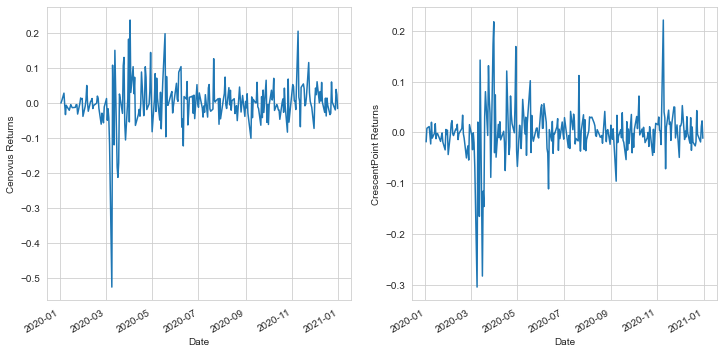

In [56]:
CVE_ret = Cenovus['Adj Close'] / Cenovus['Adj Close'].shift(1) - 1
CNRL_ret = CNRL['Adj Close'] / CNRL['Adj Close'].shift(1) - 1


fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

CVE_ret.loc['2020-01-01':'2021-01-01'].plot(figsize=(12,6), label='return', ax=axes[0])
axes[0].set_ylabel('Cenovus Returns')
CNRL_ret.loc['2020-01-01':'2021-01-01'].plot(figsize=(12,6), label='return', ax=axes[1])
axes[1].set_ylabel('CrescentPoint Returns')
#plt.tight_layout()

## At the end I would like to look at the stocks with high and low risks

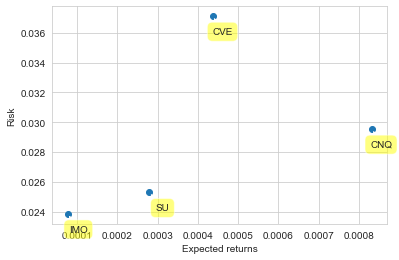

In [57]:
plt.scatter(cop_comp.mean(), cop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(cop_comp.columns, cop_comp.mean(), cop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
#Canadian Imperial and Suncor have a stocks with lower risks

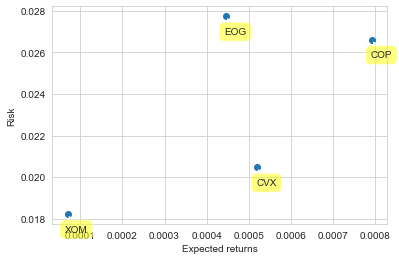

In [58]:
plt.scatter(usop_comp.mean(), usop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(usop_comp.columns, usop_comp.mean(), usop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
#American Exxon and Chevron have a stocks with lower risks